# 신용거래 이상탐지 데이터 다루기

- 사기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cc_df = pd.read_csv('fraud.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
cc_df.info() # Data 491134개
# cc_num, amt, zip, lat, long, city_pop, unix_time, merch_lat, merch_long, is_fraud : 수치형
# 나머지 : 범주형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


- 우선 카테고리별로 파고들어보자.
- 'trans_date_trans_time' : 거래 날짜 및 시간 / cc_num : 카드번호 / merchant : 상점이름 / category : 상점 카테고리 / amt : 거래금액($)
- first, last : 이름 / gender : 성별 / street, city, state, zip : 주소 / lat, long : 위도,경도 /  city_pop : 도시인구 / job : 직업
- dob : 생년월일 / trans_num : 거래번호 / unix_time : 유닉스시간 (?) / merch_lat, merch_long : 상점의 위도,경도 / is_fraud : 사기여부

In [7]:
## 확실한건, is_fraud가 종속변수인 것은 알 것 같다.
## 근데 유닉스시간..? 이게 뭐지
# Convert 'trans_date_trans_time' to datetime if it is not already in datetime format
if cc_df['trans_date_trans_time'].dtype == 'object':
    cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])
    
cc_df['unix_time_converted'] = pd.to_datetime(cc_df['unix_time'], unit='s')

cc_df[['trans_date_trans_time', 'unix_time', 'unix_time_converted']].head()

,trans_date_trans_time,unix_time,unix_time_converted
0,2019-01-01 00:00:44,1325376044,2012-01-01 00:00:44
1,2019-01-01 00:12:34,1325376754,2012-01-01 00:12:34
2,2019-01-01 00:17:16,1325377036,2012-01-01 00:17:16
3,2019-01-01 00:20:15,1325377215,2012-01-01 00:20:15
4,2019-01-01 00:23:41,1325377421,2012-01-01 00:23:41


In [8]:
(cc_df['trans_date_trans_time'] - cc_df['unix_time_converted']).describe()
## 7년 차이인건 맞는듯. 둘 중 하나는 없애는게 혼동을 주지 않겠다.

count                          491134
mean     2556 days 12:02:33.401719296
std         0 days 11:59:59.771616658
min                2556 days 00:00:00
25%                2556 days 00:00:00
50%                2557 days 00:00:00
75%                2557 days 00:00:00
max                2557 days 00:00:00
dtype: object

In [9]:
## 굳이 이름을 나눌 필요가 있을까?
cc_df['name'] = cc_df['first'] +' ' + cc_df['last']

In [10]:
cc_df.drop(columns = ['first','last'], inplace = True)

In [11]:
## 그리고 amt 뒤로 이름을 옮기자
columns = cc_df.columns.tolist()
amt_index = columns.index('amt')
columns.insert(amt_index + 1, columns.pop(columns.index('name')))
cc_df = cc_df[columns]

In [12]:
## 주소 칼럼이 필요가 있을까? 사기거래 여부인데? 나중에 쓸모가 있어지면 부르자.
## 시간 컬럼 둘 중 하나는 없애자. (unix 부분을 없애야겠다.)
## 힌트는 amt, trans_date_trans_time을 활용하라고 하네
## 이 cc_df_citydrop으로 주소없이 처리해 볼 것이다. 연관있다 싶으면 cc_df로 다시 오기
cc_df.drop(columns = ['street', 'state', 'zip'], inplace = True)

In [13]:
## unix_time도 제거해준다. trans_date_trans_time이라는 거래 시간이 있기 때문에!
cc_df.drop(columns = ['unix_time', 'unix_time_converted'], inplace = True)
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,name,gender,city,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie Gill,F,Orient,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth Robinson,M,Elizabeth,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary Wall,F,Plainfield,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel Escobar,M,Romulus,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna Brooks,F,Baton Rouge,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0


## 결측치 처리

In [14]:
cc_df.isna().sum()
##?????? 결측치가 없..어?

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
name                     0
gender                   0
city                     0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [15]:
cc_df.isna()

,trans_date_trans_time,cc_num,merchant,category,amt,name,gender,city,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
491130,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
491131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
491132,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# 결측치 확인
missing_values = cc_df.isnull().sum()

# 결측치가 있는 열만 출력
missing_values = missing_values[missing_values > 0]

print(missing_values)
## 어떻게 찾아봐도 안나온다..오 넘어가자 그러면

Series([], dtype: int64)


## 이상치 (Outlier)

In [17]:
cc_df.describe()

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,37.931230,-90.495619,1.213922e+05,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,5.341193,12.990732,3.725751e+05,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,1.228000e+03,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,38.507200,-87.591700,5.760000e+03,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,41.520500,-80.731000,5.083500e+04,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624,1.000000


In [18]:
cc_df['cc_num'].sort_values() # 엇 맞다 중복데이터 처리

378075           503874407318
230588           503874407318
421413           503874407318
468378           503874407318
345085           503874407318
                 ...         
53631     4956828990005111019
485223    4956828990005111019
264968    4956828990005111019
63475     4956828990005111019
450904    4956828990005111019
Name: cc_num, Length: 491134, dtype: int64

In [19]:
## 중복 데이터 처리 과정
cc_df[cc_df['cc_num'].duplicated()] # 동일한 카드내역을 많이 쓴 걸 보니 특정 사람이 사용했나봐

,trans_date_trans_time,cc_num,merchant,category,amt,name,gender,city,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
10,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,Sabrina Johnson,F,Thompson,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,048dc7fc7ae8efd51f59f7176e6a8bd7,38.419431,-109.380252,0
20,2019-01-01 01:09:57,180048185037117,"fraud_Rippin, Kub and Mann",misc_net,3.79,Mary Wall,F,Plainfield,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,7c63dd07b14aac7dc99f4587d83dd599,40.813669,-75.283465,0
45,2019-01-01 03:10:00,4587657402165341815,fraud_Friesen-D'Amore,gas_transport,77.59,Amber Lewis,F,Pembroke Township,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,24bc3a291efe739d2f801fdc487ee3f2,41.818260,-88.129609,0
47,2019-01-01 03:47:28,3583635130604947,fraud_Bauch-Raynor,grocery_pos,205.79,Crystal Gamble,F,Philadelphia,40.0369,-75.0664,1526206,Structural engineer,1985-01-01,2fdd291bd3d6fc707973f3e920d9e815,40.650005,-74.298184,0
50,2019-01-01 03:49:56,4646845581490336108,fraud_Block Group,misc_pos,1.10,Julia Bell,F,West Sayville,40.7320,-73.1000,4056,Film/video editor,1990-06-25,6b10287ffb26869d974ecf9db719f630,40.478410,-72.974367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca Erickson,F,Wilmington,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana Howell,F,Bradley,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann Lawson,F,Burbank,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


In [20]:
cc_df[cc_df['cc_num'] == 3556613125071656] 
## lat, long은 그 사람이 사는 주소인 것 같다.
## 실질적으로 거래 장소인 merch_lat, merch_long이 필요하다
# cc_df.drop(columns = ['lat', 'long'], inplace = True)

## 고객과 상점 간 거리도 파악해보고 싶어서 추후에 지우지 않기로 결정했다.

,trans_date_trans_time,cc_num,merchant,category,amt,name,gender,city,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
131,2019-01-01 09:57:52,3556613125071656,fraud_Cummings LLC,gas_transport,64.20,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,f0bb50a78f9642c209ddb73d0da07828,28.471527,-95.319439,0
206,2019-01-01 13:26:09,3556613125071656,fraud_Kihn Inc,shopping_pos,6.27,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,8873e906d0e50f84baffda43100d15b1,28.339809,-95.370525,0
408,2019-01-01 18:39:21,3556613125071656,fraud_Huel Ltd,misc_net,100.93,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,3b5396bad5d7031734738623abcc2839,29.503850,-95.406555,0
500,2019-01-01 20:46:25,3556613125071656,fraud_Jast and Sons,food_dining,7.96,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,624af98b7f17d7cb90afec6c8021b992,29.647211,-96.031527,0
538,2019-01-01 21:34:03,3556613125071656,"fraud_Gottlieb, Considine and Schultz",shopping_net,704.59,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,3365c5a9e2cfbe1f442be14d11b9002c,28.515471,-96.157095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490886,2020-12-31 19:27:30,3556613125071656,fraud_Heathcote LLC,shopping_net,8.50,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,5f755fe387f680485bc26dcb1789a3e6,28.930613,-96.033467,0
490926,2020-12-31 20:14:22,3556613125071656,fraud_Weimann-Lockman,kids_pets,15.77,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,700f7a5e67448033550af405ba4138c3,28.731210,-96.433537,0
490927,2020-12-31 20:14:26,3556613125071656,fraud_Cartwright PLC,kids_pets,106.28,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,7a0c394008023af0e39519563c5f0548,29.289108,-95.576631,0
490976,2020-12-31 21:16:46,3556613125071656,fraud_Stark-Batz,entertainment,7.34,Jose Vasquez,M,Lake Jackson,29.0393,-95.4401,28739,Futures trader,1999-12-27,69ce6700ed3a3d9d86167a8079f483a8,28.599619,-95.170763,0


In [21]:
#### 혹시 문제가 생기면 이 열을 지우자.
cc_df['cc_num'] = cc_df['cc_num'].astype('category') 

In [22]:
## amt
cc_df['amt'].sort_values().tail(30)

211811     6994.53
263533     6996.39
474062     7029.48
373795     7134.75
444188     7343.29
227538     7470.87
122493     7486.04
423643     7886.26
36430      8217.23
75434      8221.84
180201     8255.19
56071      8266.86
38830      8524.52
378122     8645.35
187340     8981.87
30016      9931.82
42020     10469.09
61122     10525.07
9831      10776.59
336301    10881.08
472079    11052.59
480766    11586.34
271107    12025.30
341782    12176.55
352828    13149.15
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: amt, dtype: float64

뭔가.. 하루종일 결측치 처리, 이상치 처리 여부, 컬럼 처리, 해당 값 확인, 피처 엔지니어링 계획만 해서 진전이 없다 ㅠㅠ

In [23]:
cc_df[cc_df['amt'] > 10000] # 비싼거 대부분은 travel인가?

,trans_date_trans_time,cc_num,merchant,category,amt,name,gender,city,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
9831,2019-01-22 15:24:15,2264937662466770,"fraud_Ritchie, Bradtke and Stiedemann",travel,10776.59,Juan Sherman,M,San Antonio,29.3641,-98.4924,1595797,Land,1995-10-17,16928015dca994adc051afe4b42b1c54,29.772325,-98.593405,0
42020,2019-03-25 17:38:55,372509258176510,fraud_Tillman LLC,travel,10469.09,Kristen Hanson,F,Goodrich,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,37d46917137e98e2299a80603c270008,42.192907,-84.094660,0
43412,2019-03-28 16:53:47,630451534402,fraud_Ankunding-Carroll,travel,14630.68,Rachel Daniels,F,Wetmore,46.3535,-86.6345,765,Immunologist,1972-06-12,c3fd5aeb603b150ce5c05c7ee38ada97,46.944452,-85.746696,0
49446,2019-04-07 15:32:23,6538441737335434,fraud_Tillman LLC,travel,17897.24,Gina Grimes,F,Clarks Mills,41.3851,-80.1752,606,Energy manager,1997-09-22,1c9f2b574fb9bf860c76ea200252fe05,41.361042,-79.665772,0
61122,2019-04-27 13:27:50,4003989662068504,"fraud_Reichel, Bradtke and Blanda",travel,10525.07,Chris White,M,Bessemer,33.3224,-86.9657,71463,Radio broadcast assistant,1989-02-08,e4aa11789bc7a79d59121bd4dbe1e585,32.565170,-86.935466,0
93045,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,Kenneth Foster,M,Lawrence,42.6911,-71.1605,76383,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,42.397174,-71.474163,0
198719,2019-11-17 20:00:17,2264937662466770,fraud_Goyette-Herzog,travel,15047.03,Juan Sherman,M,San Antonio,29.3641,-98.4924,1595797,Land,1995-10-17,969e374d8c4e1a628b60150391a70742,29.849413,-98.224021,0
271107,2020-02-28 20:00:17,4099707841315751,"fraud_Eichmann, Hayes and Treutel",travel,12025.30,James Stephens,M,Ruckersville,38.2586,-78.4074,9815,"Designer, ceramics/pottery",1975-07-07,36630542bbc3b0ba523461187f6cb6f7,37.681951,-77.443076,0
336301,2020-06-11 18:14:29,639023984367,fraud_Little-Gleichner,travel,10881.08,Destiny Lowe,F,Hannawa Falls,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,b83ab10106c55573db22f24f11386954,45.300250,-75.881408,0
341782,2020-06-18 23:43:03,4908846471916297,fraud_Veum-Koelpin,travel,12176.55,Lauren Torres,F,Grandview,32.2779,-97.2351,5875,"Radiographer, therapeutic",1992-07-24,dd86bf552af89093cd91f2788899456c,32.931738,-96.358340,0


In [24]:
cc_df.groupby(['category'])['amt'].agg(['max', 'sum', 'mean','median'])


,max,sum,mean,median
category,,,,
entertainment,792.09,2458569.93,73.130371,56.240
food_dining,663.92,1508778.45,41.933809,25.090
gas_transport,154.03,2903118.47,63.071509,61.970
grocery_net,185.81,1259079.01,51.420363,49.675
grocery_pos,392.00,5415410.50,126.759293,105.790
health_fitness,594.17,1712777.02,54.520994,40.020
home,560.81,2408821.40,55.579635,41.380
kids_pets,472.76,2217809.08,55.039312,40.740
misc_net,4084.34,2067748.82,82.121960,15.990


### category별 구매금액 조사 결과,
- grocery_pos가 가장 높은 평균 금액과 합계가 나왔다. -> 식료품을 주로 많이 이용하는 것 같다.
- travel은 max가 가장 컸지만, median이 가장 작은 값이 나왔다. -> 국내 여행부터 장거리 여행? 까지 비용이 매우 다양한 것 같다.
- shopping 목록도 이와 비슷한 현상이 발견되었다.

<AxesSubplot:ylabel='amt'>

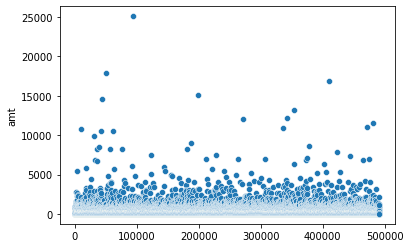

In [25]:
## 이게 이상치인가?
sns.scatterplot(x=cc_df.index, y = cc_df['amt']) # 이상치도 딱히 없는 것 같다.

## Step 1-2. 최소 2개 이상의 새로운 피처(변수)를 생성해봅시다.

In [26]:
## 우선, 시간에서 건드려 볼 데이터가 있을까? 
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  category      
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   amt                    491134 non-null  float64       
 5   name                   491134 non-null  object        
 6   gender                 491134 non-null  object        
 7   city                   491134 non-null  object        
 8   lat                    491134 non-null  float64       
 9   long                   491134 non-null  float64       
 10  city_pop               491134 non-null  int64         
 11  job                    491134 non-null  object        
 12  dob                    491134 non-null  obje

In [27]:
## 시간, 분으로 일단 나눠보자
cc_df['trans_hour'] = cc_df['trans_date_trans_time'].dt.hour
cc_df['trans_day'] = cc_df['trans_date_trans_time'].dt.day
cc_df['trans_minute'] = cc_df['trans_date_trans_time'].dt.minute

In [28]:
# 
cc_df['log_amt'] = np.log1p(cc_df['amt']) # log 가 아닌 1og1p (log를 해도 상관없다.)

In [29]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,name,gender,city,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_minute,log_amt
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie Gill,F,Orient,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0,1,0,4.684259
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth Robinson,M,Elizabeth,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,0,1,12,3.822317
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary Wall,F,Plainfield,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,0,1,17,3.856087
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel Escobar,M,Romulus,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,0,1,20,4.175771
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna Brooks,F,Baton Rouge,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,0,1,23,3.280159


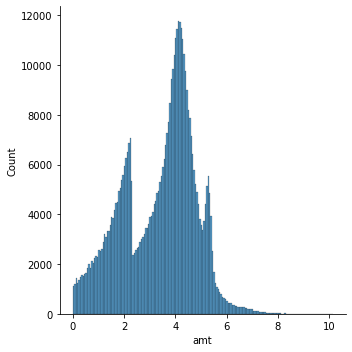

In [30]:
# amt 값이 너무 차이가 나서 비교를 위해 log - transformation 진행
sns.displot(np.log(cc_df['amt']))

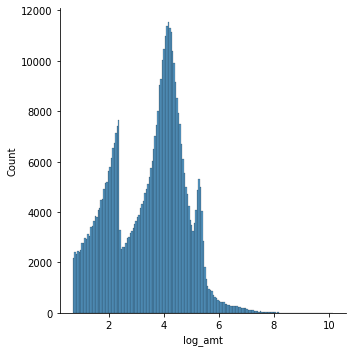

In [31]:
sns.displot(cc_df['log_amt'])

In [32]:
#!pip install geopy

In [33]:
from geopy.distance import geodesic

In [34]:
### Step 2-1. 위도/경도 정보 활용
## 고객과 상점간의 거리 계산해보자 (이건 gpt에게 직접 물어봤다.. geodesic이라는 함수가 있더라)
cc_df['dist'] = cc_df.apply(lambda x: geodesic((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).miles, axis=1)

In [35]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,name,gender,city,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_minute,log_amt,dist
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie Gill,F,Orient,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0,1,0,4.684259,18.775736
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth Robinson,M,Elizabeth,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,0,1,12,3.822317,52.639215
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary Wall,F,Plainfield,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,0,1,17,3.856087,42.109187
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel Escobar,M,Romulus,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,0,1,20,4.175771,13.870711
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna Brooks,F,Baton Rouge,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,29.737426,-90.853194,0,0,1,23,3.280159,49.335782


In [36]:
## 가만 보니까 성별 amt와 category별 항목을 보고 싶었다.
cc_df.groupby(['gender', 'category'])['amt'].mean()

## 대체적으로 Femaie쪽 소비가 많았다. (gas나 health 등은 male이 우세했다.)

gender  category      
F       entertainment      78.025540
        food_dining        44.761746
        gas_transport      61.654242
        grocery_net        53.756234
        grocery_pos       150.229132
        health_fitness     53.988191
        home               54.887404
        kids_pets          54.324829
        misc_net           85.577980
        misc_pos           72.839561
        personal_care      48.607446
        shopping_net       84.314187
        shopping_pos       86.336408
        travel             61.486937
M       entertainment      62.880067
        food_dining        35.585234
        gas_transport      65.955663
        grocery_net        45.817839
        grocery_pos        63.153277
        health_fitness     55.739393
        home               57.428380
        kids_pets          57.140211
        misc_net           74.024721
        misc_pos           71.222414
        personal_care      34.685932
        shopping_net       73.005296
        shoppin

In [37]:
## 통계적 관점으로 접근하여 유용한 변수
## 고객별 정보 (아까 중복 자료 많아서)
customer_stats = cc_df.groupby('cc_num').agg(
    avg_amount=('amt', 'mean'),
    transaction_count=('trans_num', 'count')
).reset_index()

In [38]:
cc_df = cc_df.merge(customer_stats, on = 'cc_num', how = 'left')

In [39]:
## one_hot encoding
cc_df = pd.get_dummies(cc_df, columns = ['merchant','category','gender','job'], drop_first = True) # 1번째 값이 없어진다.

In [40]:
## 불필요한 컬럼 제거
cc_df.head()

## 시간 Data, 위치 Data를 일단 제거
cc_df.drop(columns = ['trans_date_trans_time', 'lat', 'long', 'merch_lat', 'merch_long'], inplace = True)

### Scaling

In [41]:
from sklearn.preprocessing import StandardScaler ## 이상치가 없기 때문에 표준화로 진행
ss = StandardScaler()

In [42]:
# ss.fit(cc_df)

In [43]:
#ss_df = pd.DataFrame(ss.transform(cc_df), columns = cc_df.columns)

## 모델학습도 해보고 싶었다.

In [44]:
## 이 데이터에는 뭘 쓸지 몰라서 gpt에게 추천받았다.
## Randomforest가 좋다고 한다.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [45]:
## train, test을 나눠야하는건 어느정도 알고 있었기에, 패키지를 찾아봤다.
## 위의 train_test_split이 있었다.
## x,y를 나누고 train, test를 나누면 되겠다.

In [ ]:
## x,y 나눌거면 x에만 하면 되잖아 스케일링을
x = cc_df.drop(columns = ['is_fraud'])
y = cc_df['is_fraud']

x_scaled = ss.fit_transform(x)

In [1]:
# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=62)

NameError: name 'train_test_split' is not defined

In [ ]:
## 오늘은 여기까지만..

## 회고
- 왜 unix와 trans_time은 딱 7년 차이가 날까? 혼동을 주기 싫으니깐 둘 중 한 컬럼을 없애야 겠다고 생각했다.
- 열이 많아지는 것을 원치 않으니 이름은 합치는게 좋겠다. (나중에 이름별로 나누고 싶은 마음이 있으면 str.split()을 이용해서 나눈 뒤 분석을 진행하면 된다.
- 결측치 없는 데이터는 처음 본다.. (이렇게 많은 양의 데이터인데?)
- 불필요한 컬럼 날리고 이상치 여부, 컬럼 처리 하는 데에만 오후 3시까지 시간을 썼다... (2시간 동안 분석 어떻게 해 ㅠㅠ 그래도 해야지.. 메인퀘스트인데)

- 이상치를 처리하고 싶은데 amt 부분의 travel은 여행경비로 충분히 많은 돈을 지출할 만하다고 생각해서 제거하지 않았다.
- lat, long 데이터는 원래 고객 데이터는 지웠지만, 후에 상점과 고객 간 거리?도 계산해 볼 가능성이 생겨 지우지 않았다.
- : 결국 쓰지 않았다.

- np.log를 해도 상관이 없다..(inf가 나서 오류가 발생할 수도 있었나보다. 1을 더해주는 np.log1p를 발견했다. 이 데이터에서는 큰 차이 없었다.)
- 위도/경도를 계산하래서 거리밖에 생각이 나지 않는데 도저히 떠오르지 않았다. 보통 gpt를 참고는 하지만 그대로 인용해서 습득해 보는 경험을 처음 해보는 것 같다.

- 그런데.. 거리 계산하는데 시간이 너무 오래걸렸다.
- one-hot encoding 방법이 시원하지가 않다. 뭔가 더 필요한 거 같다.
- Step2-2 말고도 더 통계적인 방법으로 낼 수 있는 것들이 있을 것 같다. 시간이 되면(복습시간) 더 만들어 보고 싶긴 하다.
- 자꾸 커널이 죽는다. 데이터가 커서 그런가 그래서 scaling부터는 하지 못했다.. 코딩만 해놓고.. 해결방법이 없을까

- 

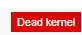